<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/classification/voting_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#보팅(Voting)
### :서로다른 3가지 모델이 같은 데이터 세트에 대해 학습하고 예측한 결과로 보팅을 통해 최종 예측을 하는것
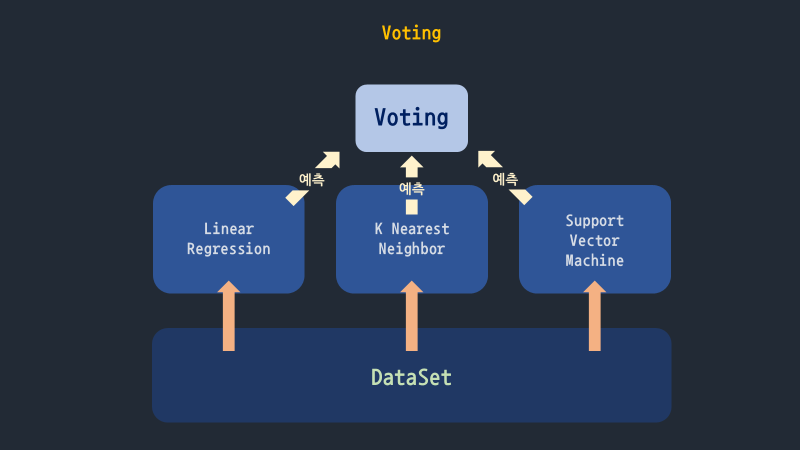

##보팅 유형
### 하드보팅(Hard Voting) vs 소프트보팅(Soft Voting)


### 하드보팅(Hard Voting)
#### : 예측한 결과값들 중 다수의 모델이 결정한 예측값을 최종 결과값으로 선정하는 것
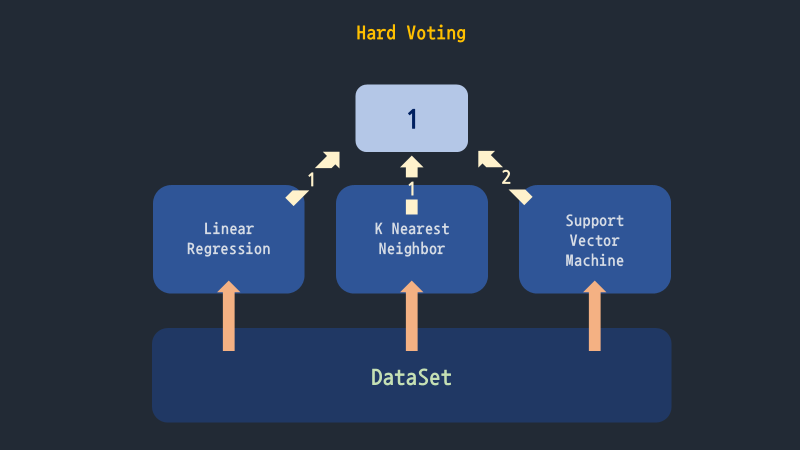

### 소프트보팅(Soft Voting)
#### : 모델의 레이블 값 결정 확률을 모두 더하고 이를 평균하여 이들 중 가장 높은 레이블 값을 최종 결값으로 선정하는 것
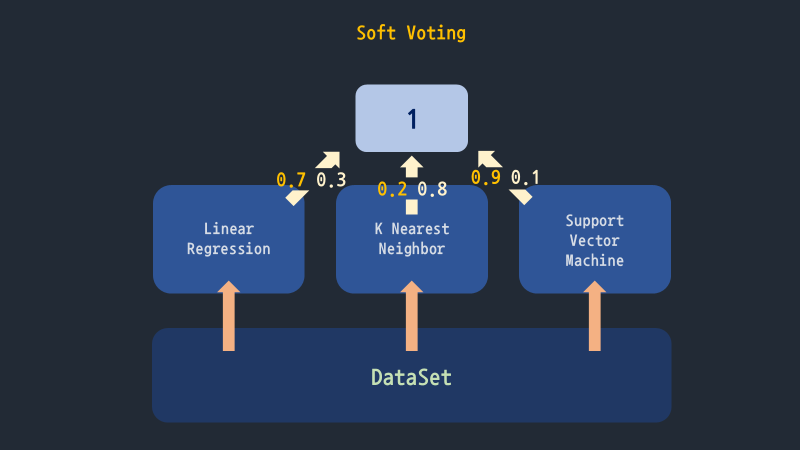

일반적으로는 하드보팅보다 소프트보팅이 예측 성능이 좋아서 소프트보팅이 더 많이 사용됨.

## 보팅 분류기(Voting Classifier)
: 사이킷런에서는 VotingClassifier 클래스를 제공

보팅 분류기를 사용해 위스콘신 유방암 데이터 세트를 예측 분석
- **load_breast_cancer()**함수로 데이터 세트 생성 가능

In [ ]:
import pandas as pd
#앙상블 보팅 분류기
from sklearn.ensemble import VotingClassifier
#보팅에 사용될 모델(LogisticRegression, KNeighborsClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#위스콘신 유방암 데이터 세트
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:

#보팅에 사용할 개별 모델
model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors=8)

#앙상블 모델 소프트 보팅 분류기
#estimators = 사용할 모델들, voting = 보팅 유형 default = 'hard'
clf = VotingClassifier(estimators=[("LR",model1), ("KNN",model2)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state = 156)

#VotingClassifier 학습/예측/평가
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("Voting 분류기 정확도 : {}".format(round(accuracy_score(y_test, pred),4)))

#개별 모델 학습/예측/평가
for model in [model1, model2]:
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print(f"{model.__class__.__name__} 정확도 : {round(accuracy_score(y_test, pred), 4)}")

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


보팅 분류기의 정확도가 조금 더 성능이 좋게나왔지만 **항상 좋게 나오지는 않음**